<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/4thWeekTask/Visualiasi_StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#membaca dataset dari google drive
df = pd.read_csv('/content/drive/MyDrive/ML Dataset/StudentsPerformance.csv')

**Insight**


informasi parental level of education
*  Bachelor's degree: orang tua siswa telah menyelesaikan pendidikan sarjana (S1)
*  Master's degree: orang tua siswa telah menyelesaikan pendidikan pascasarjana (S2)
*  Associate's degree: gelar akademik yang biasanya didapat setelah dua tahun kuliah, biasanya diperguruan tinggi komunitas
*  Some college: orang tua telah berkuliah di universitas tetapi tidak sampai lulus
*  High school: orang tua siswa hanya menyelesaikan pendidikan tingka SMA
*  Some high school: orang tua siswa hanya bersekolah di SMA, tetapi tidak menyelesaikannya


Informasi kolom lunch

*  Standard: siswa membayar untuk makanan siang dengan harga penuh, yang biasanya menunjukkan kondisi ekonomi keluarga yang baik
*  Free/reduced: siswa menerima makanan siang gratis atau dengan potongan harga, yang biasanya diberikan kepada keluarga dengan penghasilan rendah atau siswa yang memenuhi syarat program subsidi


In [18]:
#menampilkan data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
#menampilkan informasi dari data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
#melihat unique values dari masing-masing kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'gender':
['female' 'male']

Unique values in column 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in column 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in column 'lunch':
['standard' 'free/reduced']

Unique values in column 'test preparation course':
['none' 'completed']



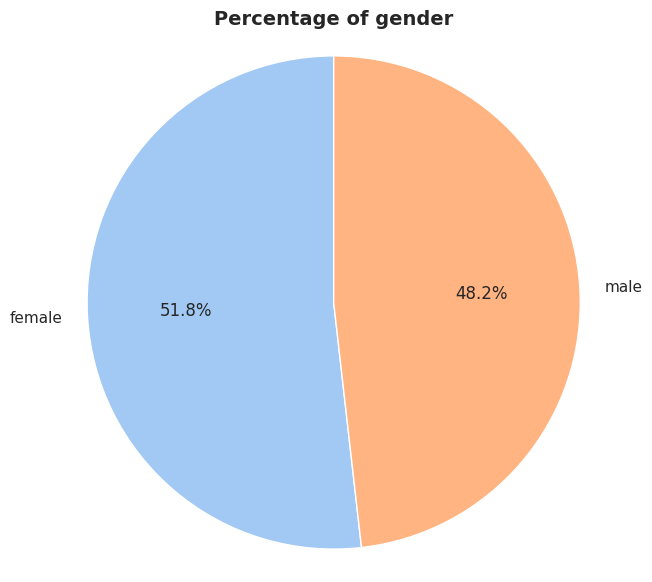

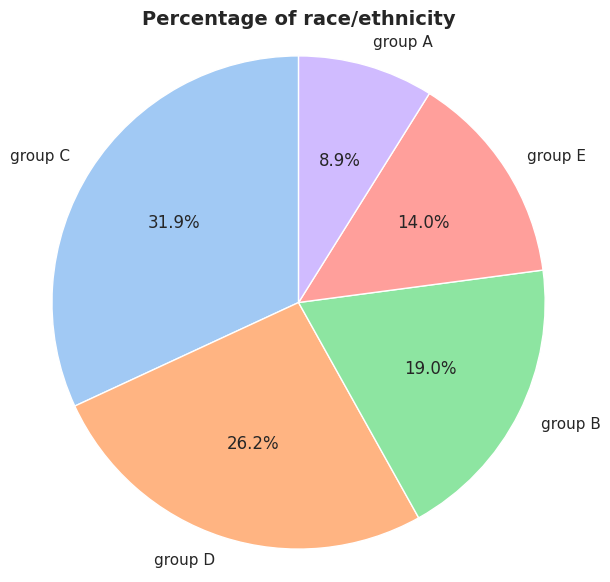

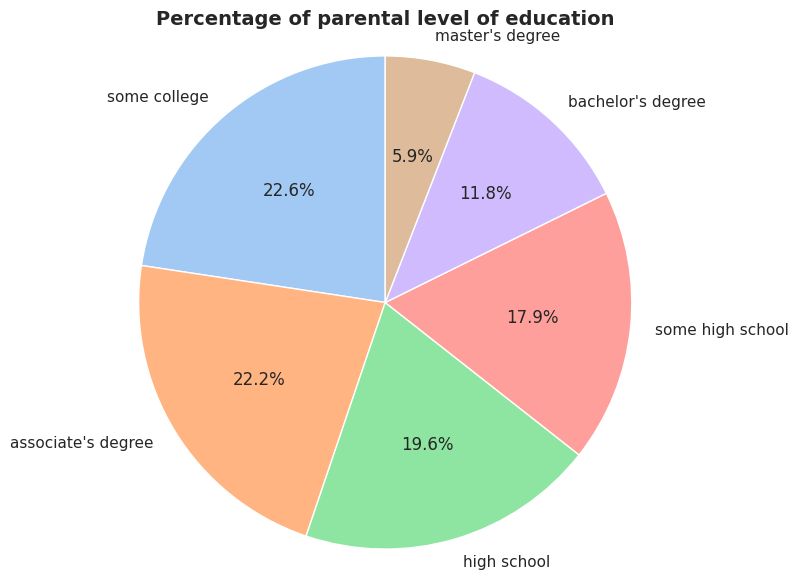

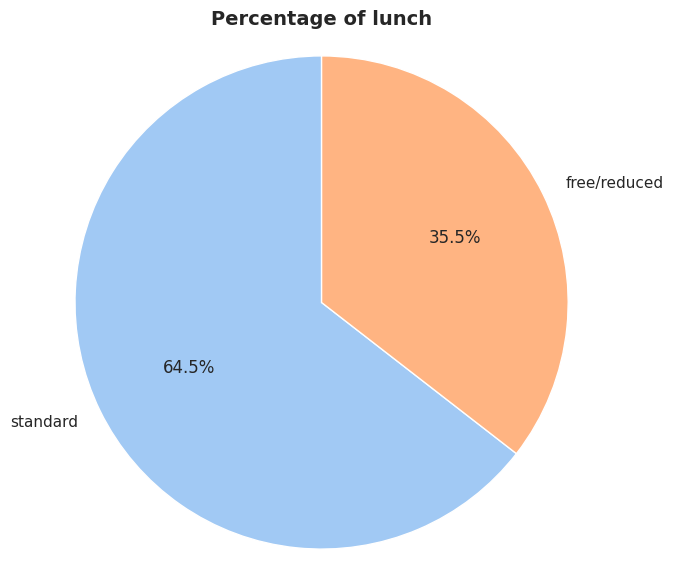

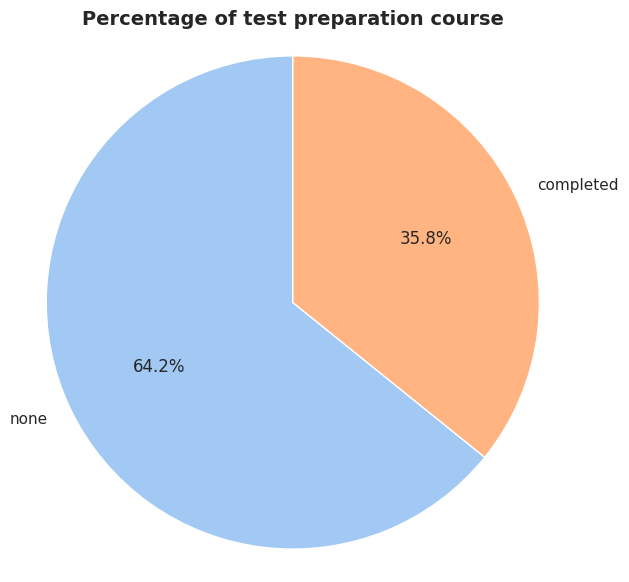

In [21]:
#mengatur gaya grafik seaborn untuk estetika lebih baik
sns.set(style="whitegrid")

#fungsi untuk menampilkan persentase dari kolom kategorikal menggunakan pie chart
def plot_pie_chart(column_name):
    #menghitung persentase setiap kategori
    data = df[column_name].value_counts()
    labels = data.index
    sizes = data.values

    #membuat pie chart
    plt.figure(figsize=(7,7))
    colors = sns.color_palette("pastel", len(labels))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

    plt.axis('equal')
    plt.title(f'Percentage of {column_name}', fontsize=14, fontweight='bold')
    plt.show()

#contoh penggunaan untuk kolom 'gender'
plot_pie_chart('gender')

#anda bisa mengganti 'gender' dengan kolom kategorikal lainnya, misalnya:
plot_pie_chart('race/ethnicity')
plot_pie_chart('parental level of education')
plot_pie_chart('lunch')
plot_pie_chart('test preparation course')


**Insight**

1. Data wanita lebih banyak dibandingkan laki-laki
2. Etnik yang paling banyak ialah grup c, lalu dikuti dengan grup d, dan grup b
3. Jenjang pendidikan orang tua yang paling banyak ialah some college, associate's degree, dan high school
4. siswa yang termasuk kategori standard atau siswa yang membayar untuk makanan siang dengan harga penuh lebih banyak dibandingkan dengan kategori free/reduced atau siswa menerima makanan siang gratis atau dengan potongan harga
5. Kebanyakan siswa belum menyelesaikan preparation coursenya

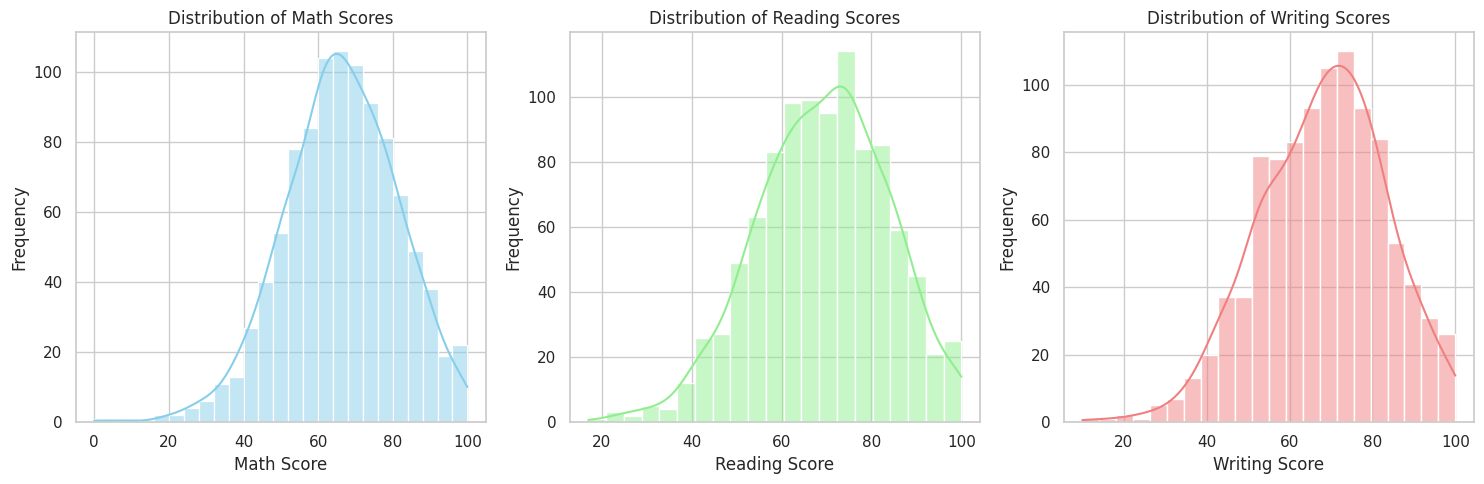

In [22]:
#mengatur gaya untuk grafik
sns.set(style="whitegrid")

#membuat subplot untuk menampilkan distribusi dari setiap skor
plt.figure(figsize=(15,5))

#1. distribusi nilai math
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

#2. distribusi nilai reading
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='lightgreen')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

#3. distribusi nilai writing
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='lightcoral')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

#menampilkan grafik
plt.tight_layout()
plt.show()

**Insight:**

Persebaran data untuk math score lebih bervariasi dan cenderung terdapat nilai yang lebih buruk dibandingkan dengan yang lain, yang dapat kita lihat bahwa pada math score terdapat data nilai 0, sedangkan untuk writing score memiliki persebaran yang dimulai dari kurang dari 20 namun tidak dari nilai 0, begitu juga dengan reading score yang merupakan persebaran data nilai yang cenderung lebih baik dibandingkan 2 lainnya

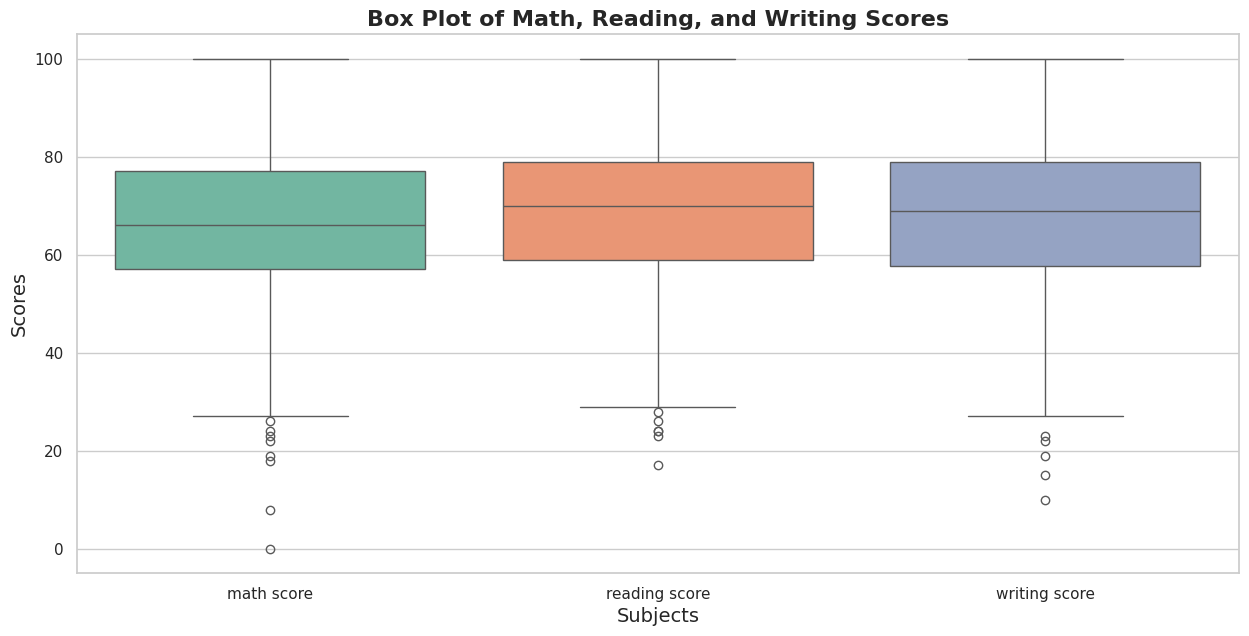

In [23]:
#mengatur gaya untuk grafik seaborn
sns.set(style="whitegrid")

#membuat boxplot untuk math, reading, dan writing score
plt.figure(figsize=(15,7))

#menghubungkan data math, reading, writing score untuk boxplot
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], palette="Set2")

#menambahkan judul dan label
plt.title('Box Plot of Math, Reading, and Writing Scores', fontsize=16, fontweight='bold')
plt.xlabel('Subjects', fontsize=14)
plt.ylabel('Scores', fontsize=14)

#menampilkan grafik
plt.show()

**Insight:**

dari box plot untuk math, reading, dan writing kita dapat melihat data math score memiliki lebih banyak outlier dan box plot ini selaras dengan data persebaran yang ditampilkan sebelumnya

<Figure size 1000x600 with 0 Axes>

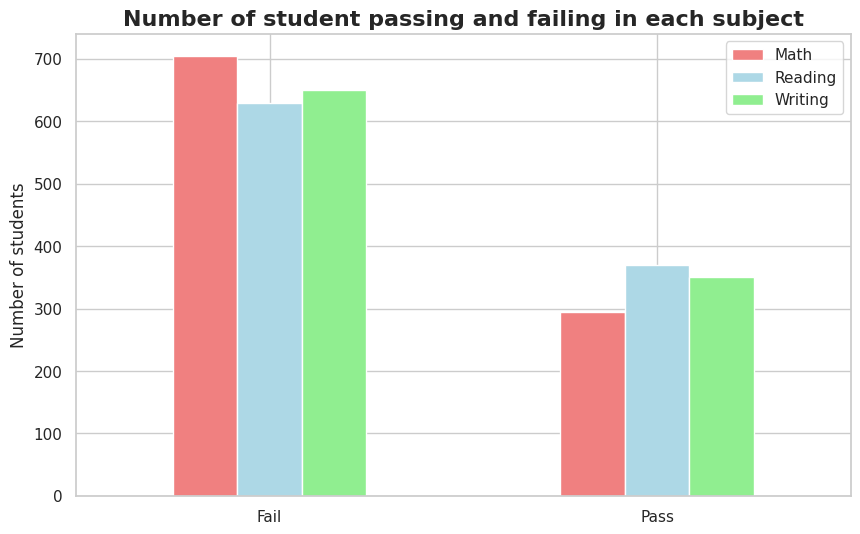

In [24]:
# Definisikan fungsi untuk menentukan lulus atau tidak
def pass_fail(score):
  return 'Pass' if score >= 75 else 'Fail'

# Tambahkan kolom baru untuk pass/fail berdasarkan math, reading, dan writing scores
df['math_result'] = df['math score'].apply(pass_fail)
df['reading_result'] = df['reading score'].apply(pass_fail)
df['writing_result'] = df['writing score'].apply(pass_fail)

#menghitungkan jumlah siswa yang pass dan fail untuk masing-masing pelajaran
math_pass_fail = df['math_result'].value_counts()
reading_pass_fail = df['reading_result'].value_counts()
writing_pass_fail = df['writing_result'].value_counts()

#membuat dataframe baru untuk memudahkan visualisasi
result_df = pd.DataFrame({
    'Math': math_pass_fail,
    'Reading': reading_pass_fail,
    'Writing': writing_pass_fail
})

#Visualisasi hasil menggunakan bar chart
plt.figure(figsize=(10,6))
result_df.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Number of student passing and failing in each subject', fontsize=16, fontweight='bold')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()

**Insight:**

Math:
1. merupakan subject dengan siswa fail terbanyak
2. merupakan subject dengan siswa pass paling sedikit
3. jumlah siswa fail berjumlah 700 orang
4. jumlah siswa pass berjumlah 300 orang

Reading:
1. merupakan subject dengan siswa fail paling sedikit
2. merupakan subject dengan siswa pass paling banyak
3. jumlah siswa fail berjumlah sekitar diantara 600 hingga 650 orang
4. jumlah siswa pass berjumlah sekitar diantara 350 hingga 400 orang

Writing:
1. merupakan subject kedua dengan fail dan pass terbanyak
2. jumlah siswa fail berjumlah sekitar kurang lebih 650 orang
3. jumlah siswa pass berjumlah sekitar kurang lebih 350 orang


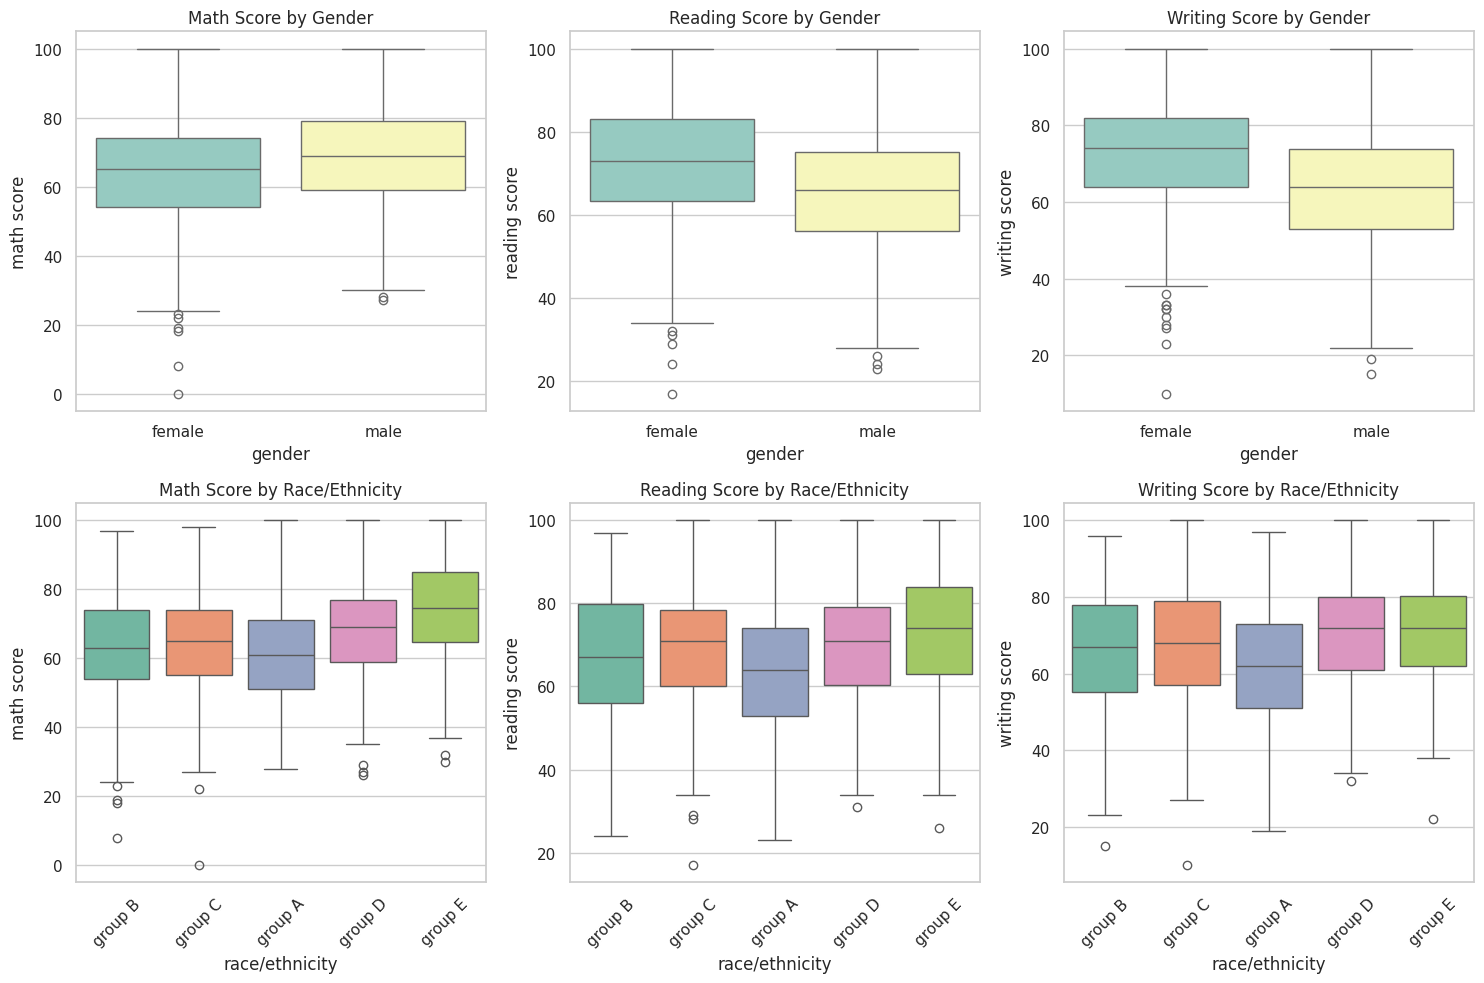

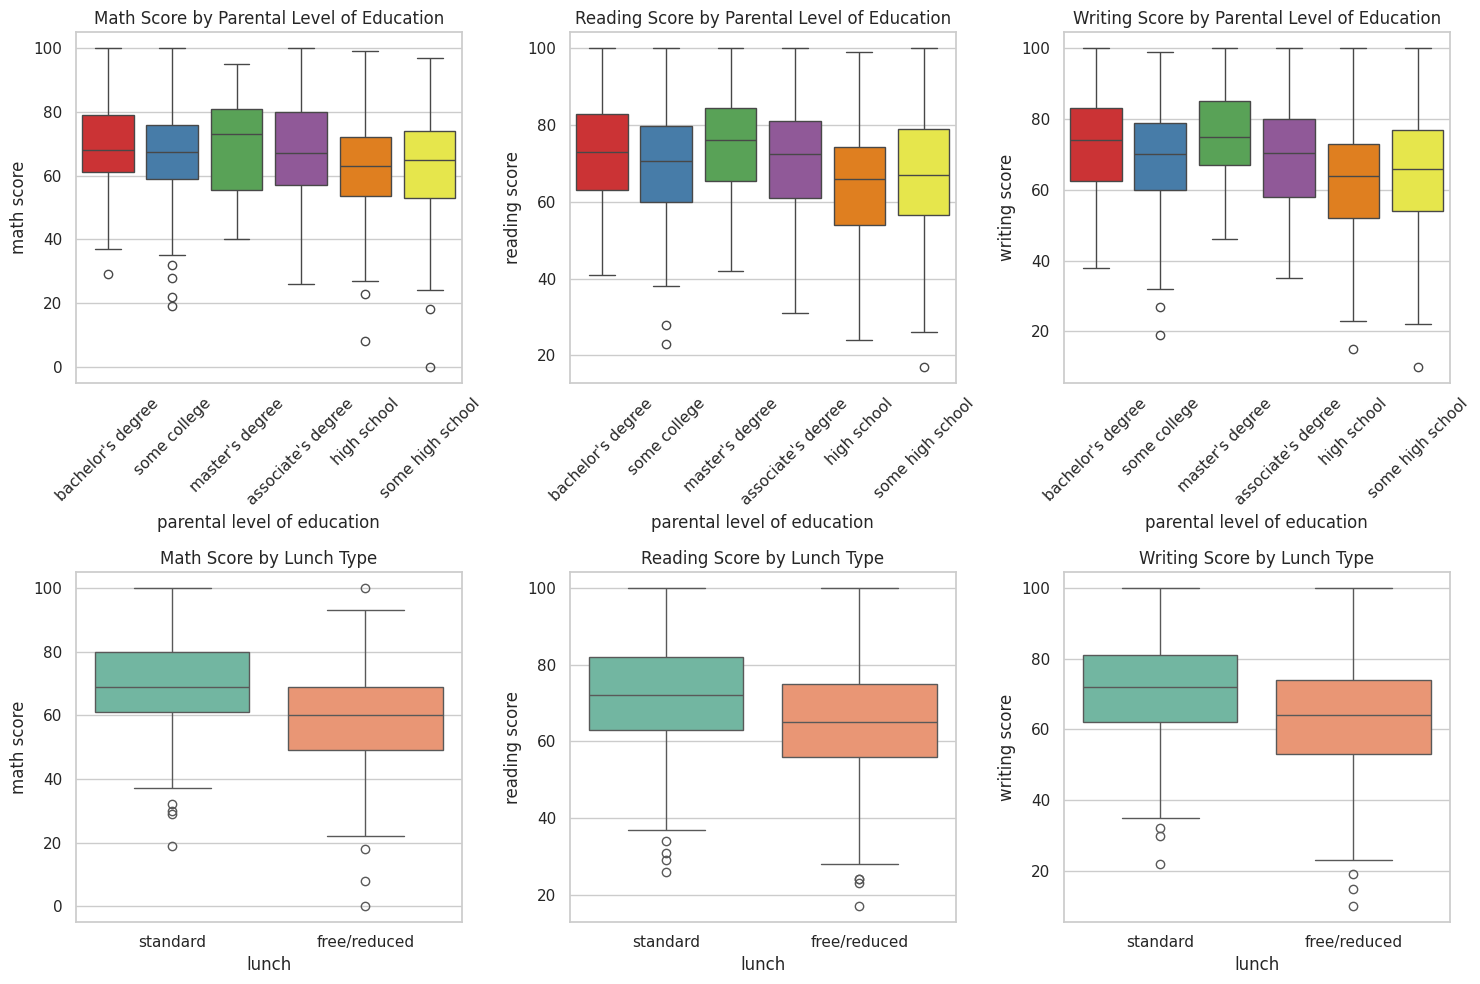

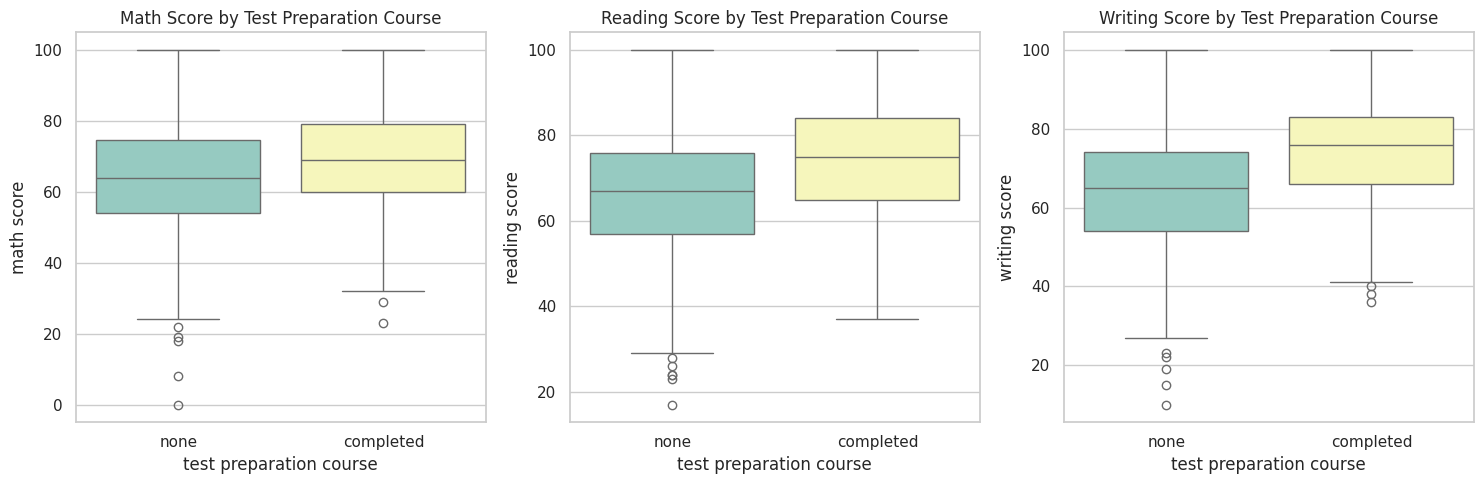

In [25]:
# Membuat visualisasi boxplot untuk memeriksa pengaruh gender
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='gender', y='math score', data=df, hue='gender', palette="Set3", dodge=False)
plt.title('Math Score by Gender')

plt.subplot(2, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df, hue='gender', palette="Set3", dodge=False)
plt.title('Reading Score by Gender')

plt.subplot(2, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df, hue='gender', palette="Set3", dodge=False)
plt.title('Writing Score by Gender')

# Membuat visualisasi boxplot untuk memeriksa pengaruh race/ethnicity
plt.subplot(2, 3, 4)
sns.boxplot(x='race/ethnicity', y='math score', data=df, hue='race/ethnicity', palette="Set2", dodge=False)
plt.title('Math Score by Race/Ethnicity')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(x='race/ethnicity', y='reading score', data=df, hue='race/ethnicity', palette="Set2", dodge=False)
plt.title('Reading Score by Race/Ethnicity')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(x='race/ethnicity', y='writing score', data=df, hue='race/ethnicity', palette="Set2", dodge=False)
plt.title('Writing Score by Race/Ethnicity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Membuat visualisasi untuk parental level of education
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='parental level of education', y='math score', data=df, hue='parental level of education', palette="Set1", dodge=False)
plt.title('Math Score by Parental Level of Education')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(x='parental level of education', y='reading score', data=df, hue='parental level of education', palette="Set1", dodge=False)
plt.title('Reading Score by Parental Level of Education')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(x='parental level of education', y='writing score', data=df, hue='parental level of education', palette="Set1", dodge=False)
plt.title('Writing Score by Parental Level of Education')
plt.xticks(rotation=45)

# Membuat visualisasi untuk lunch
plt.subplot(2, 3, 4)
sns.boxplot(x='lunch', y='math score', data=df, hue='lunch', palette="Set2", dodge=False)
plt.title('Math Score by Lunch Type')

plt.subplot(2, 3, 5)
sns.boxplot(x='lunch', y='reading score', data=df, hue='lunch', palette="Set2", dodge=False)
plt.title('Reading Score by Lunch Type')

plt.subplot(2, 3, 6)
sns.boxplot(x='lunch', y='writing score', data=df, hue='lunch', palette="Set2", dodge=False)
plt.title('Writing Score by Lunch Type')

plt.tight_layout()
plt.show()

# Membuat visualisasi untuk test preparation course
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='test preparation course', y='math score', data=df, hue='test preparation course', palette="Set3", dodge=False)
plt.title('Math Score by Test Preparation Course')

plt.subplot(1, 3, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df, hue='test preparation course', palette="Set3", dodge=False)
plt.title('Reading Score by Test Preparation Course')

plt.subplot(1, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df, hue='test preparation course', palette="Set3", dodge=False)
plt.title('Writing Score by Test Preparation Course')

plt.tight_layout()
plt.show()

**Insight:**

kita bisa mendapatkan insight dari box plot yang ditampilkan dengan cara melihat titik-titik data per subject yang ada, sehingga dapat dianalisis bagian data dengan korelasi seperti apa yang memiliki outlier lebih banyak


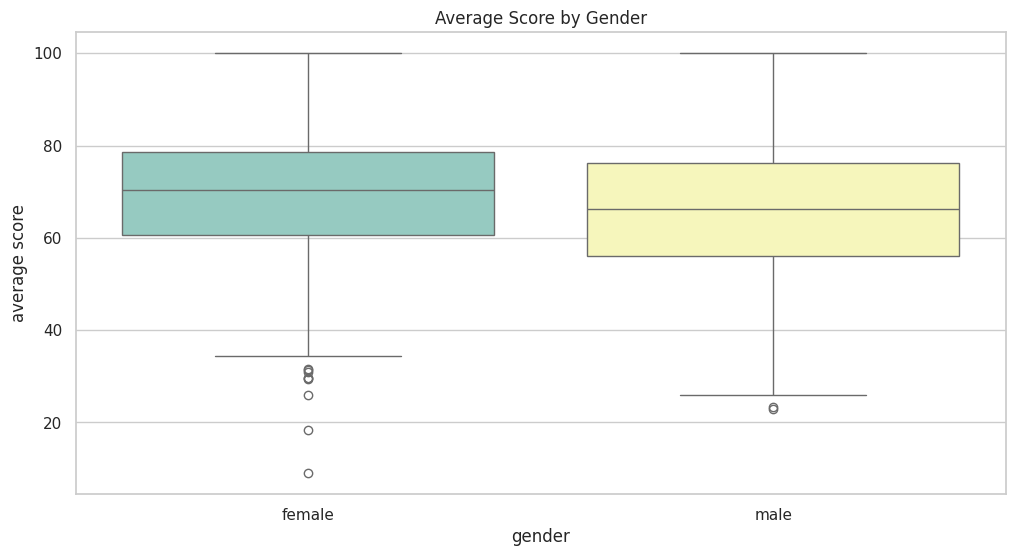

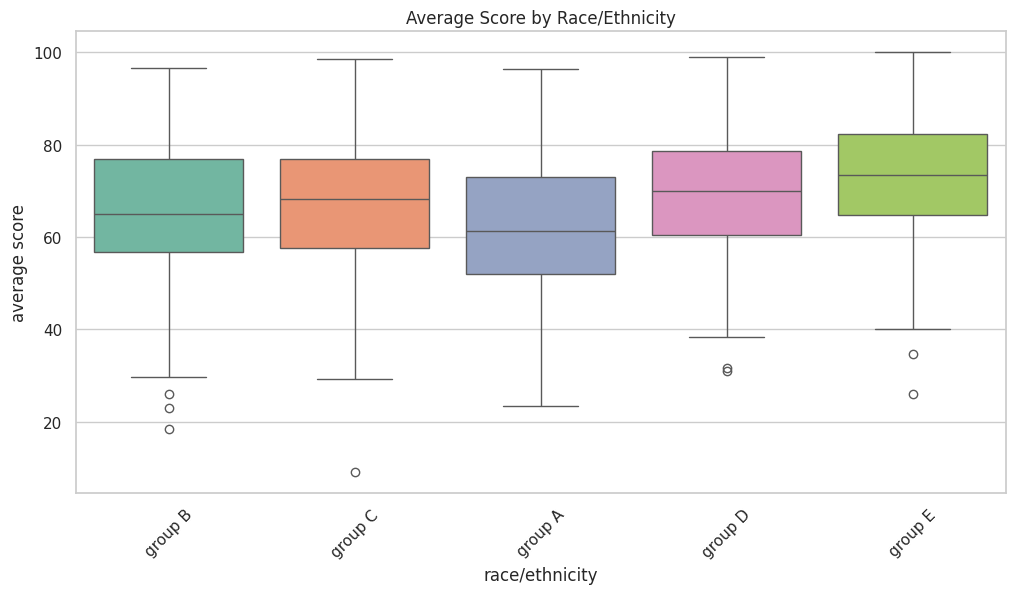

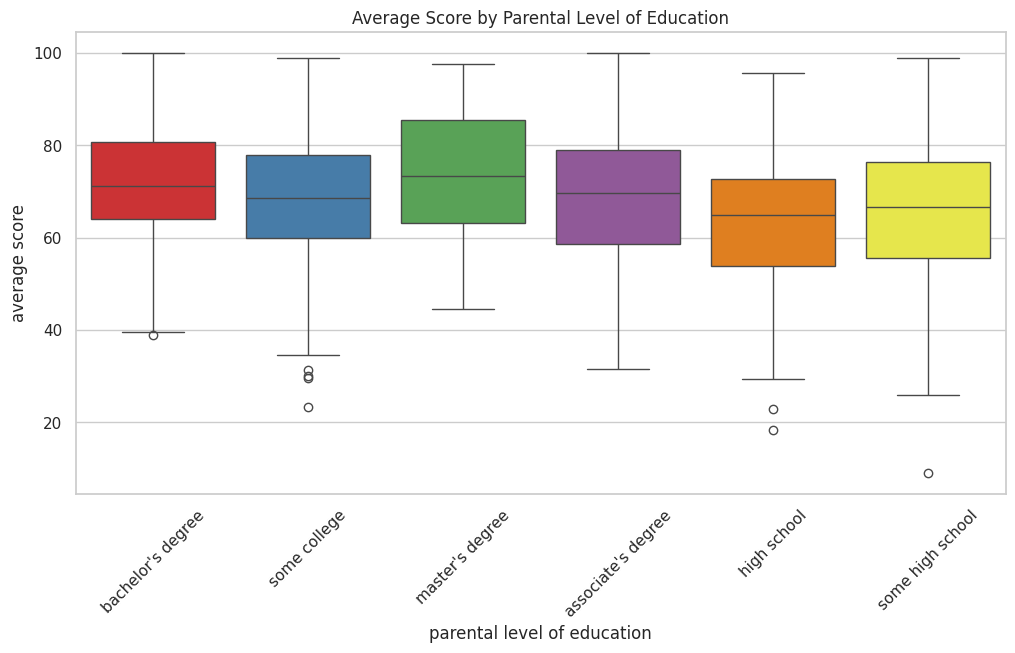

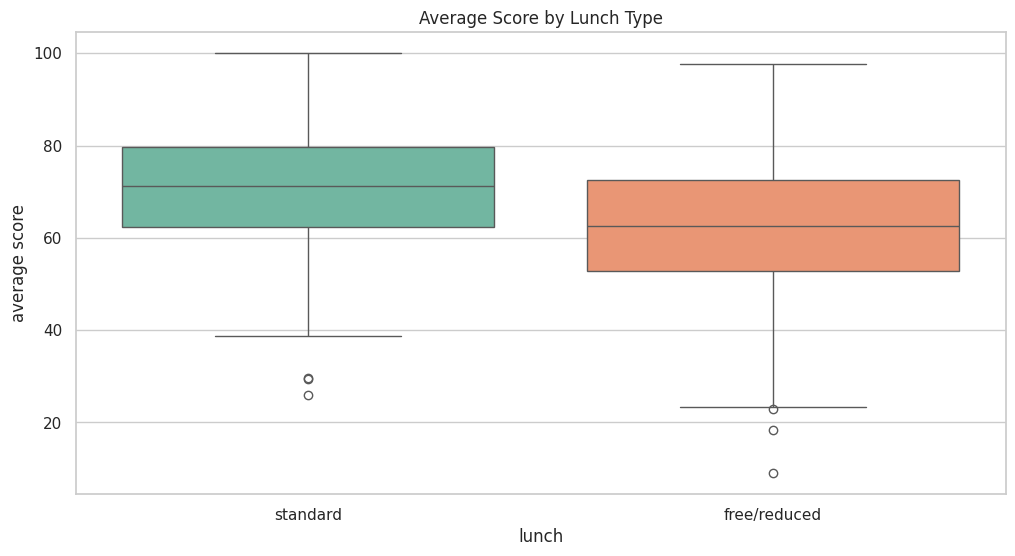

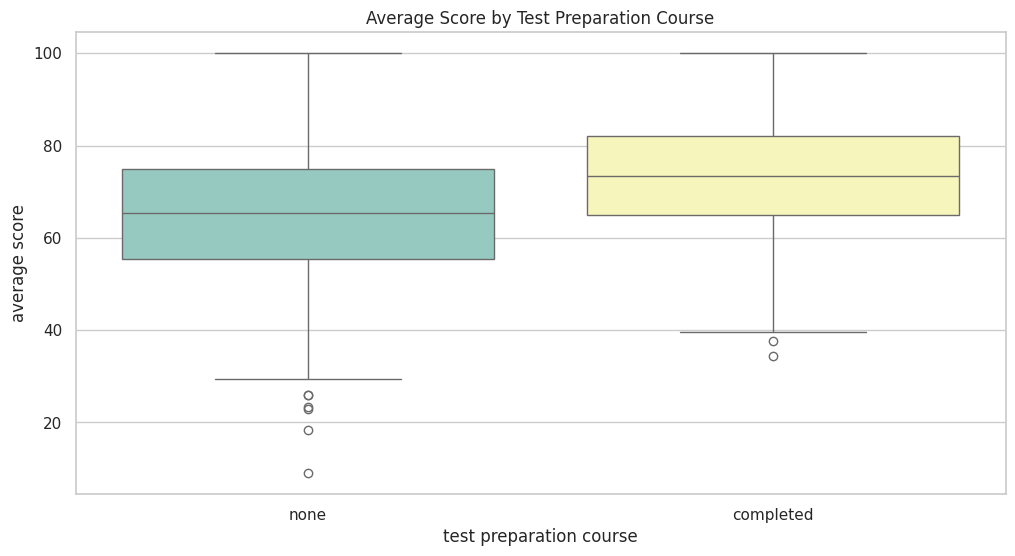

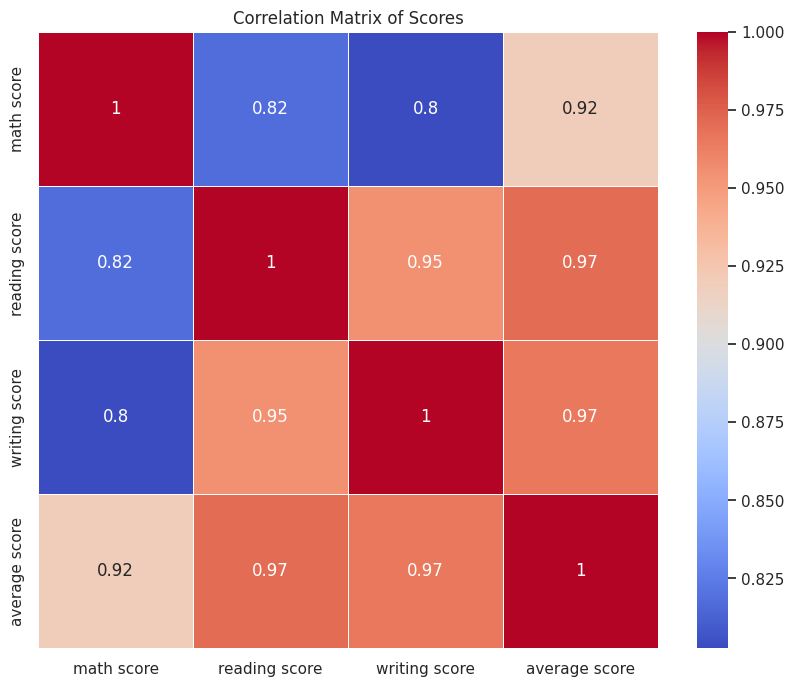

In [26]:
# Mengatur gaya grafik seaborn
sns.set(style="whitegrid")

# Menambahkan kolom baru untuk nilai rata-rata setiap siswa
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Melihat nilai rata-rata berdasarkan gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='average score', data=df, hue='gender', palette="Set3", dodge=False)
plt.title('Average Score by Gender')
plt.show()

# Melihat nilai rata-rata berdasarkan race/ethnicity
plt.figure(figsize=(12, 6))
sns.boxplot(x='race/ethnicity', y='average score', data=df, hue='race/ethnicity', palette="Set2", dodge=False)
plt.title('Average Score by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()

# Melihat nilai rata-rata berdasarkan parental level of education
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='average score', data=df, hue='parental level of education', palette="Set1", dodge=False)
plt.title('Average Score by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

# Melihat nilai rata-rata berdasarkan lunch
plt.figure(figsize=(12, 6))
sns.boxplot(x='lunch', y='average score', data=df, hue='lunch', palette="Set2", dodge=False)
plt.title('Average Score by Lunch Type')
plt.show()

# Melihat nilai rata-rata berdasarkan test preparation course
plt.figure(figsize=(12, 6))
sns.boxplot(x='test preparation course', y='average score', data=df, hue='test preparation course', palette="Set3", dodge=False)
plt.title('Average Score by Test Preparation Course')
plt.show()

# Melihat korelasi numerik antar variabel
plt.figure(figsize=(10, 8))
correlation_matrix = df[['math score', 'reading score', 'writing score', 'average score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Scores')
plt.show()

**Insight:**

1. Untuk box plot kita dapat melihat data average score by subject yang dipilih, lalu bisa dianalisa data mana yang memiliki outlier lebih banyak
2. untuk correlation matrix of scores, Correlation Matrix ini menunjukkan seberapa kuat hubungan antara berbagai skor (nilai) siswa dalam tiga mata pelajaran: math, reading, dan writing, serta rata-rata dari ketiga mata pelajaran tersebut (average score).

  Korelasi Positif (mendekati 1): Semakin mendekati 1, semakin kuat hubungan positif antara dua variabel. Ini berarti bahwa jika nilai dalam satu mata pelajaran meningkat, nilai dalam mata pelajaran lainnya cenderung meningkat juga.

  Korelasi Negatif (mendekati -1): Semakin mendekati -1, semakin kuat hubungan negatif antara dua variabel. Ini berarti bahwa jika nilai dalam satu mata pelajaran meningkat, nilai dalam mata pelajaran lainnya cenderung menurun.
  
  Korelasi Nol (0): Tidak ada hubungan yang signifikan antara dua variabel.

